<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_day_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region']
Predicted Price: 28086.322461791737


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


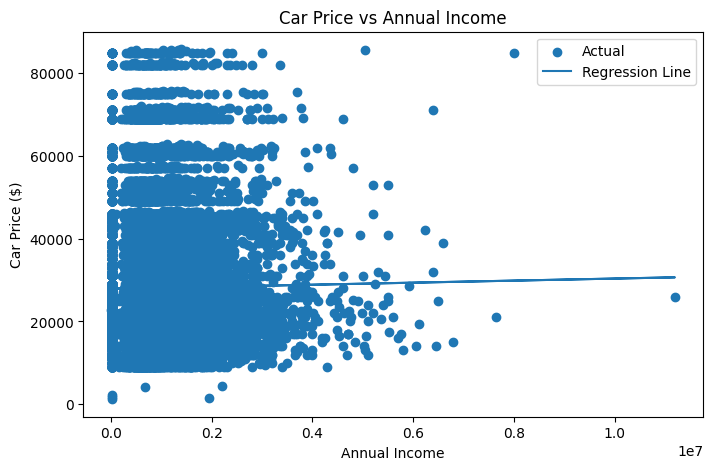

In [4]:
# ================= IMPORT LIBRARIES =================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# ================= READ FILE =================
df = pd.read_excel("/content/Car_sales.xlsx")

# ================= CLEAN COLUMN NAMES =================
df.columns = df.columns.str.strip()   # removes extra spaces
print(df.columns.tolist())


# ================= FEATURES & TARGET =================
X = df[["Annual Income"]]     # Independent variable
y = df["Price ($)"]           # Dependent variable

# ================= MODEL TRAINING =================
model = LinearRegression()
model.fit(X, y)

# ================= PREDICTION =================
predicted_price = model.predict([[815000]])
print("Predicted Price:", predicted_price[0])

# ================= VISUALIZATION =================
plt.figure(figsize=(8, 5))
plt.scatter(df["Annual Income"], df["Price ($)"], label="Actual")
plt.plot(df["Annual Income"], model.predict(X), label="Regression Line")
plt.xlabel("Annual Income")
plt.ylabel("Car Price ($)")
plt.legend()
plt.title("Car Price vs Annual Income")
plt.show()


['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region']
   Annual Income  Price ($)  Predicted_Price     Residuals
0          13500      26000     27887.702601  -1887.702601
1        1480000      19000     28251.116233  -9251.116233
2        1035000      31500     28140.840702   3359.159298
3          13500      14000     27887.702601 -13887.702601
4        1465000      24500     28247.399080  -3747.399080
Durbin-Watson Statistic: 2.0472530116398953
✅ Residuals are independent (Good model)
Predicted Price for income 815000: 28086.322461791737


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


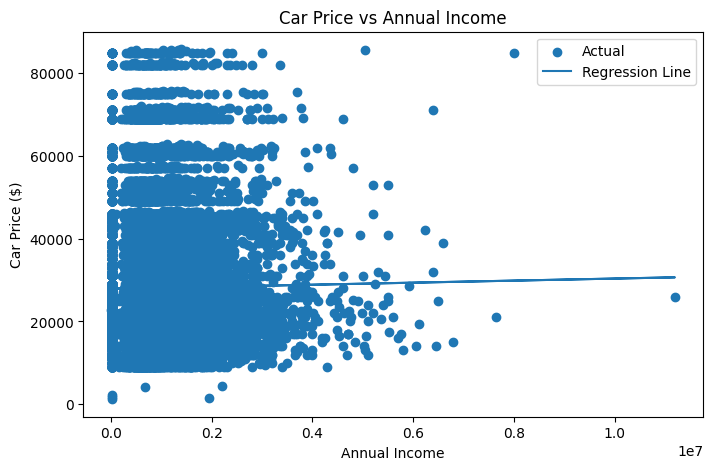

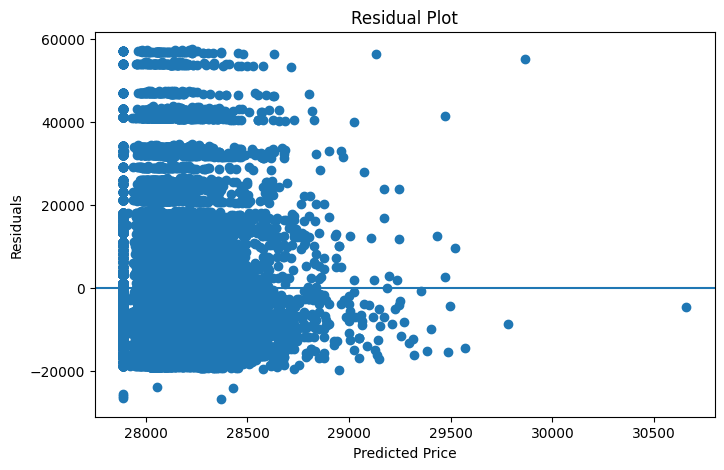

In [6]:
# ================= IMPORT LIBRARIES =================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

# ================= READ FILE =================
df = pd.read_excel("/content/Car_sales.xlsx")

# ================= CLEAN COLUMN NAMES =================
df.columns = df.columns.str.strip()
print(df.columns.tolist())

# ================= FEATURES & TARGET =================
X = df[["Annual Income"]]     # Independent variable
y = df["Price ($)"]           # Dependent variable

# ================= MODEL TRAINING =================
model = LinearRegression()
model.fit(X, y)

# ================= PREDICTIONS =================
df["Predicted_Price"] = model.predict(X)

# ================= RESIDUALS =================
df["Residuals"] = y - df["Predicted_Price"]

print(df[["Annual Income", "Price ($)", "Predicted_Price", "Residuals"]].head())

# ================= DURBIN-WATSON TEST =================
dw_stat = durbin_watson(df["Residuals"])
print("Durbin-Watson Statistic:", dw_stat)

# Interpretation
if 1.5 < dw_stat < 2.5:
    print("✅ Residuals are independent (Good model)")
else:
    print("⚠️ Residuals show autocorrelation")

# ================= PREDICTION (NEW VALUE) =================
predicted_price = model.predict([[815000]])
print("Predicted Price for income 815000:", predicted_price[0])

# ================= VISUALIZATION =================
# Regression Plot
plt.figure(figsize=(8, 5))
plt.scatter(df["Annual Income"], df["Price ($)"], label="Actual")
plt.plot(df["Annual Income"], df["Predicted_Price"], label="Regression Line")
plt.xlabel("Annual Income")
plt.ylabel("Car Price ($)")
plt.legend()
plt.title("Car Price vs Annual Income")
plt.show()

# ================= RESIDUAL PLOT =================
plt.figure(figsize=(8, 5))
plt.scatter(df["Predicted_Price"], df["Residuals"])
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


   Advertising_Spend      Sales  Predicted_Sales     Residuals
0              16795   77487.09     84832.274213  -7345.184213
1               1860   19792.18     10477.008866   9315.171134
2              39158  259530.67    196168.517866  63362.152134
3              45732  230343.27    228897.778957   1445.491043
4              12284   80872.66     62373.847565  18498.812435


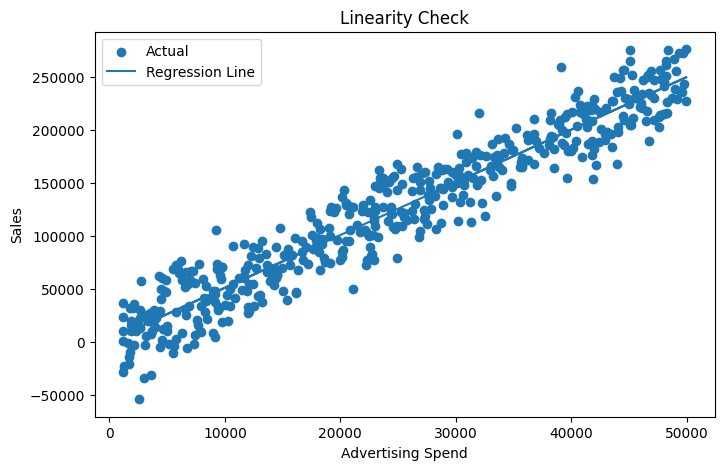

Durbin-Watson value: 1.9453630562216315


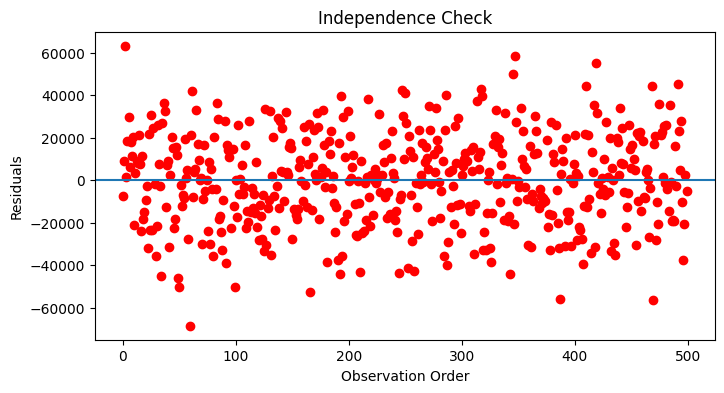

In [9]:
# ================= IMPORT LIBRARIES =================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

# ================= READ FILE =================
df = pd.read_csv("/content/sales_data_assumption (1).csv")

# ================= FEATURES & TARGET =================
X = df[['Advertising_Spend']]
y = df['Sales']

# ================= TRAIN LINEAR REGRESSION MODEL =================
model = LinearRegression()
model.fit(X, y)

# ================= PREDICTIONS & RESIDUALS =================
df["Predicted_Sales"] = model.predict(X)
df["Residuals"] = y - df["Predicted_Sales"]

print(df.head())

# ================= ASSUMPTION 1: LINEARITY =================
plt.figure(figsize=(8, 5))
plt.scatter(df["Advertising_Spend"], df["Sales"], label="Actual")
plt.plot(df["Advertising_Spend"], df["Predicted_Sales"], label="Regression Line")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.title("Linearity Check")
plt.legend()
plt.show()

# ================= ASSUMPTION 2: INDEPENDENCE =================
# Durbin-Watson Test
dw_value = durbin_watson(df["Residuals"])
print("Durbin-Watson value:", dw_value)

# Residual Plot (Order Check)
plt.figure(figsize=(8, 4))
plt.plot(df["Residuals"], marker="o", color="red", linestyle="")
plt.axhline(0)
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.title("Independence Check")
plt.show()


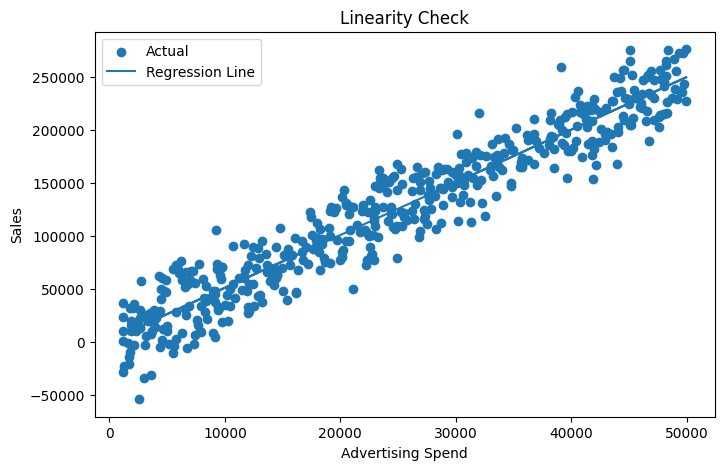

Durbin-Watson: 1.9453630562216315
✅ Residuals are independent


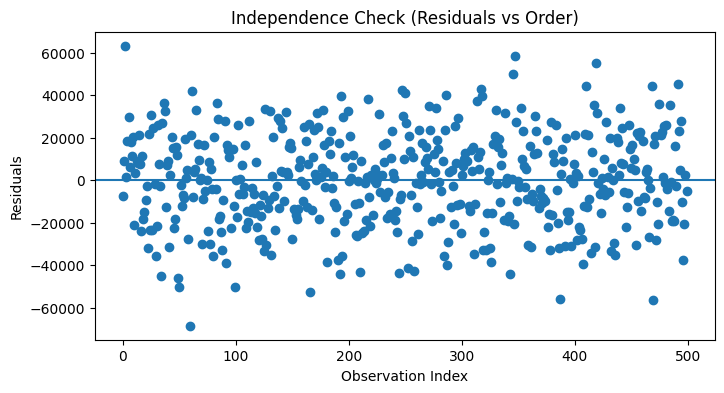

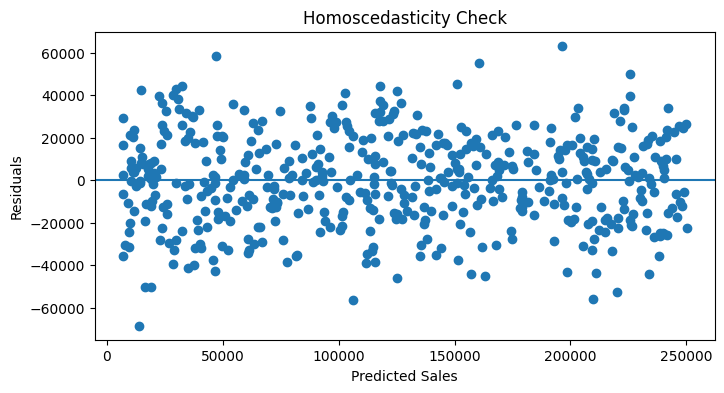

In [21]:
# ================= IMPORT LIBRARIES =================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.stattools import durbin_watson

# ================= READ DATA =================
df = pd.read_csv("/content/sales_data_assumption (1).csv")

# ================= FEATURES & TARGET =================
X = df[["Advertising_Spend"]]
y = df["Sales"]

# ================= MODEL TRAINING =================
model = LinearRegression()
model.fit(X, y)

# ================= PREDICTIONS =================
df["Predicted_Sales"] = model.predict(X)
df["Residuals"] = y - df["Predicted_Sales"]

# # ================= MODEL PERFORMANCE =================
# r2 = r2_score(y, df["Predicted_Sales"])
# mae = mean_absolute_error(y, df["Predicted_Sales"])
# rmse = np.sqrt(mean_squared_error(y, df["Predicted_Sales"]))

# print("R² Score:", r2)
# print("MAE:", mae)
# print("RMSE:", rmse)

# ================= ASSUMPTION 1: LINEARITY =================
plt.figure(figsize=(8, 5))
plt.scatter(df["Advertising_Spend"], y, label="Actual")
plt.plot(df["Advertising_Spend"], df["Predicted_Sales"], label="Regression Line")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.title("Linearity Check")
plt.legend()
plt.show()

# ================= ASSUMPTION 2: INDEPENDENCE =================
dw_value = durbin_watson(df["Residuals"])
print("Durbin-Watson:", dw_value)

if 1.5 < dw_value < 2.5:
    print("✅ Residuals are independent")
else:
    print("⚠️ Residuals show autocorrelation")

plt.figure(figsize=(8, 4))
plt.scatter(range(len(df)), df["Residuals"])
plt.axhline(0)
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.title("Independence Check (Residuals vs Order)")
plt.show()

# ================= ASSUMPTION 3: HOMOSCEDASTICITY =================
plt.figure(figsize=(8, 4))
plt.scatter(df["Predicted_Sales"], df["Residuals"])
plt.axhline(0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

   Advertising_Spend      Sales  Predicted_Sales     Residuals
0              16795   77487.09     84832.274213  -7345.184213
1               1860   19792.18     10477.008866   9315.171134
2              39158  259530.67    196168.517866  63362.152134
3              45732  230343.27    228897.778957   1445.491043
4              12284   80872.66     62373.847565  18498.812435


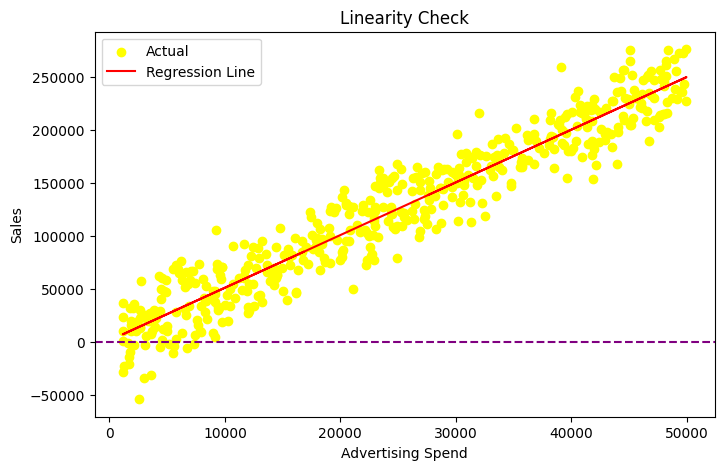

Durbin-Watson value: 1.9453630562216315


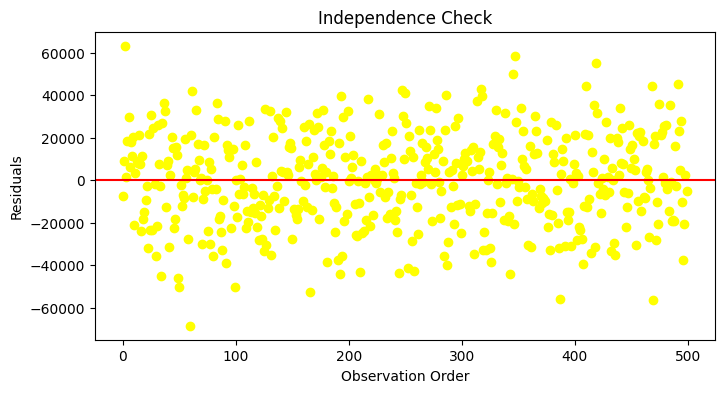

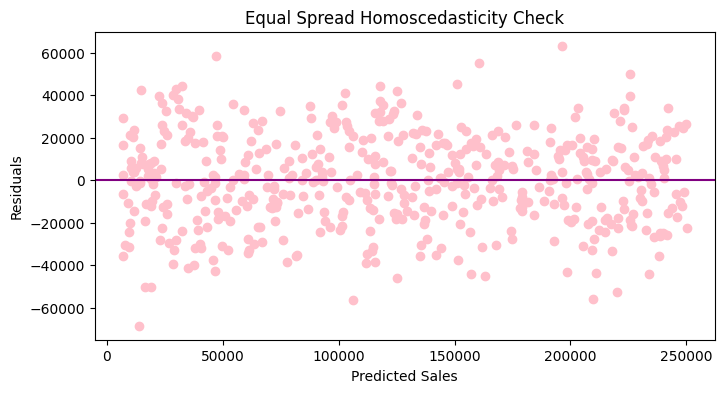

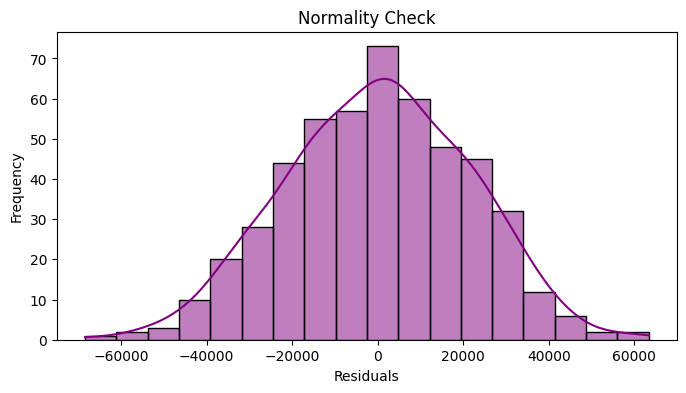

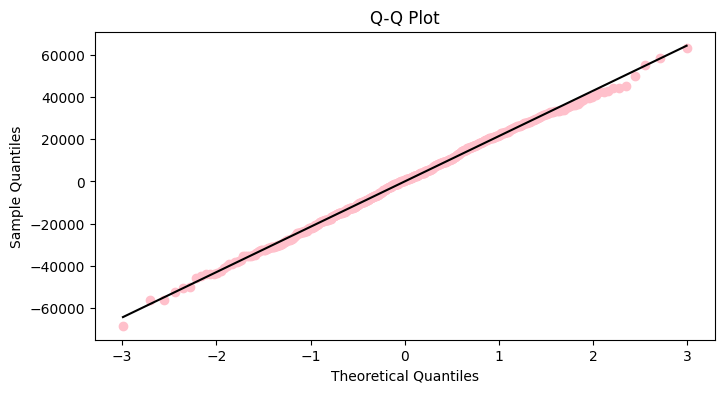

In [47]:
from matplotlib.lines import lineStyles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.stattools import durbin_watson

# Read File
df = pd.read_csv("/content/sales_data_assumption (1).csv")
# Features and Target
x = df[["Advertising_Spend"]]
y = df["Sales"]
# Model Training
model = LinearRegression()
model.fit(x,y)
# Prediction
df["Predicted_Sales"] = model.predict(x)
df["Residuals"] = y - df["Predicted_Sales"]
print(df.head())
# Assumption 1 Linearity
plt.figure(figsize=(8,5))
plt.scatter(df["Advertising_Spend"], y, label="Actual", color="yellow")
plt.plot(df["Advertising_Spend"], df["Predicted_Sales"], label="Regression Line", color="red")
plt.axhline(0, color="purple", linestyle="--")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.title("Linearity Check")
plt.legend()
plt.show()
# # Assumption 2 Independence
# dw_value = durbin_watson(df["Residuals"])
# print("Durbin-Watson value:", dw_value)
# # Plot
# plt.figure(figsize=(8,4))
# plt.plot(df['Residuals'], marker='o', color='red')
# plt.axhline(0)
# plt.xlabel("Oberservation Order")
# plt.ylabel("Residuals")
# plt.title("Independence Check")
# plt.show()

# ASSUMPTION 2: INDEPENDENCE
# Durbin-Watson Test
dw_value = durbin_watson(df["Residuals"])
print("Durbin-Watson value:", dw_value)

# Residual Plot (Order Check)
plt.figure(figsize=(8, 4))
plt.plot(df["Residuals"], marker="o", color="yellow", linestyle="")
plt.axhline(0, color="red")
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.title("Independence Check")
plt.show()

# Equal Spread
plt.figure(figsize=(8, 4))
plt.scatter(df["Predicted_Sales"], df["Residuals"], color="pink")
plt.axhline(0, color="purple")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Equal Spread Homoscedasticity Check")
plt.show()
# Normality
plt.figure(figsize=(8, 4))
sns.histplot(df["Residuals"], kde=True, color="purple")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality Check")
plt.show()
# Q-Q Plot
plt.figure(figsize=(8, 4))
stats.probplot(df["Residuals"], dist="norm", plot=plt)
# add colors
plt.gca().get_lines()[0].set_color("pink")  # points
plt.gca().get_lines()[1].set_color("black")   # reference line
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")
plt.show()
